## Importing necessary libraries

In [1]:
'''#!pip install -U PyDrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials
'''

In [4]:
#importing basic libraries
import os
import numpy as np
import pandas as pd
import random
import matplotlib.pyplot as plt
%matplotlib inline
#from jupyterthemes import jtplot
#jtplot.style(theme='monokai',context='notebook',ticks=True,grid=False)

In [5]:
#importing Image processing libraries
from PIL import Image
import cv2

In [6]:
#import train-test-split library
from sklearn.model_selection import train_test_split

## Data Preprocessing

In [ ]:
infected = os.listdir('cell_images/Parasitized/')
uninfected = os.listdir('cell_images/Uninfected/')

In [ ]:
data = []
label = []

print('Running Phase 1...')

for i in infected:
    try:
        image = cv2.imread('cell_images/Parasitized/'+i)
        image_array = Image.fromarray(image).resize((28,28))
        data.append(np.array(image_array))
        label.append(1)
    except AttributeError:
        print('')

print('Completed Phase 1')
print('------------------------')

print('Running Phase 2')

for u in uninfected:
    try:
        image = cv2.imread('cell_images/Uninfected/'+u)
        image_array = Image.fromarray(image).resize((28,28))
        data.append(np.array(image_array))
        label.append(0)
    except AttributeError:
        print('')

print('Completed Phase 2')

Running Phase 1...

Completed Phase 1
------------------------
Running Phase 2

Completed Phase 2


In [ ]:
cells = np.array(data)
labels = np.array(label)

#saving as .npy file

np.save('Cells',cells)
np.save('Labels',labels)

In [ ]:
# checking the shape of arrays

print('Size of Cells: {} | Size of Labels: {}'.format(cells.shape,labels.shape))

Size of Cells: (27558, 28, 28, 3) | Size of Labels: (27558,)


## Visualizing Samples  Data

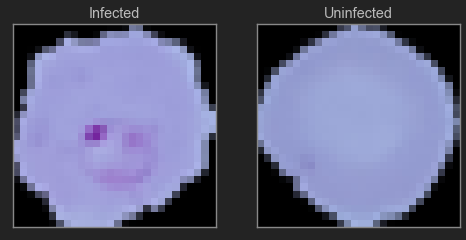

In [ ]:
# sample of infected and uninfected data

n,p = 0,0
for i in range(2):
    n+=1
    plt.subplot(1,2,n)
    plt.imshow(cells[p])
    plt.title('{}'.format('Infected' if labels[p]==1 else 'Uninfected'))
    plt.xticks([]),plt.yticks([])
    p=15000
plt.show()

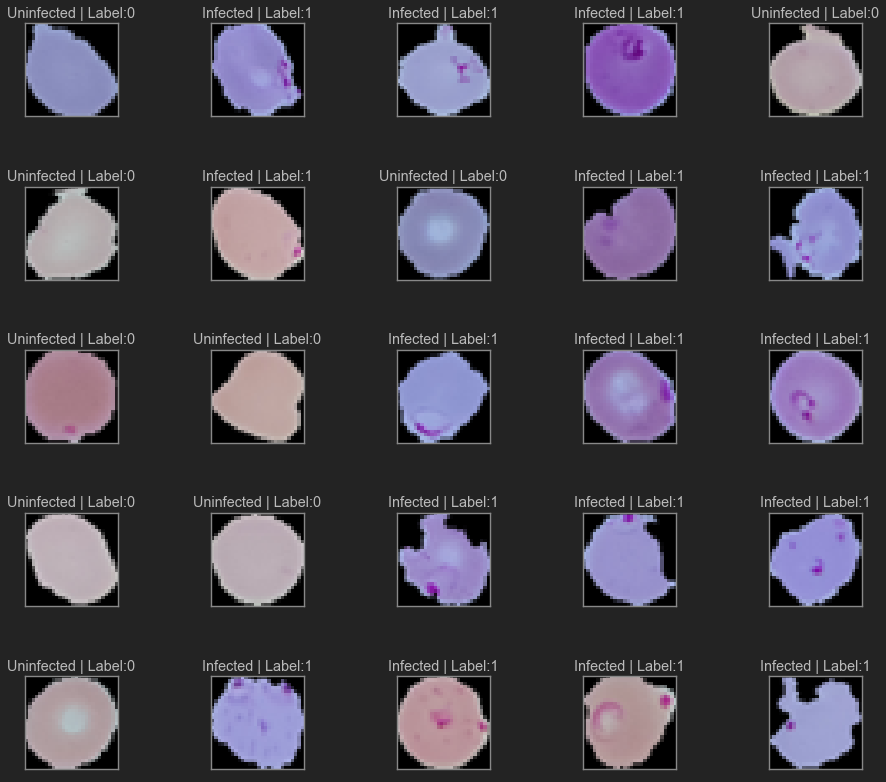

In [ ]:
# Random Samples

plt.figure(figsize=(15,15))
n = 0
for i in range(25):
    n+=1
    plt.subplot(5,5,n)
    plt.subplots_adjust(hspace = 0, wspace = 1)
    r = random.randint(0,cells.shape[0])
    plt.imshow(cells[r])
    plt.title('{} | Label:{}'.format('Infected' if labels[r]==1 else 'Uninfected',label[r]))
    plt.xticks([]),plt.yticks([])
plt.show()
    

## Splitting data into Train Test Data

In [7]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [8]:
path = '/content/drive/My Drive/Cells.npy'
cells_open = np.load(path)

In [9]:
path = '/content/drive/My Drive/Labels.npy'
labels_open = np.load('/content/drive/My Drive/Labels.npy')

In [10]:
#opening values from saved .npy files as numpy arrays

cells_open = np.load('Cells.npy')
labels_open = np.load('Labels.npy')

FileNotFoundError: ignored

In [11]:
# shuffling values

n = np.arange(27558)
np.random.shuffle(n)
cells_shuffled = cells_open[n]
labels_shuffled = labels_open[n]

print("Shuffling Completed Succesfully...")

Shuffling Completed Succesfully...


In [12]:
# Dividing by 255 to convert the RGB values in the range of 0-1
cells_shuffled = cells_shuffled/255

In [ ]:
cells_shuffled

array([[[[0.        , 0.        , 0.        ],
         [0.        , 0.        , 0.        ],
         [0.        , 0.        , 0.        ],
         ...,
         [0.        , 0.        , 0.        ],
         [0.        , 0.        , 0.        ],
         [0.        , 0.        , 0.        ]],

        [[0.        , 0.        , 0.        ],
         [0.        , 0.        , 0.        ],
         [0.        , 0.        , 0.        ],
         ...,
         [0.        , 0.        , 0.        ],
         [0.        , 0.        , 0.        ],
         [0.        , 0.        , 0.        ]],

        [[0.        , 0.        , 0.        ],
         [0.        , 0.        , 0.        ],
         [0.        , 0.        , 0.        ],
         ...,
         [0.        , 0.        , 0.        ],
         [0.        , 0.        , 0.        ],
         [0.        , 0.        , 0.        ]],

        ...,

        [[0.        , 0.        , 0.        ],
         [0.        , 0.        , 0.        ]

In [ ]:
labels_shuffled

array([1, 0, 0, ..., 0, 0, 0], dtype=int32)

In [13]:
# Splitting in Train and Test Data
x_train, x_test, y_train, y_test = train_test_split(cells_shuffled, labels_shuffled, random_state = 13, test_size = 0.2)

# Train Data- 80%
# Test Data- 20%

In [ ]:
'''
np.save('x_train',x_train)
np.save('x_test',x_test)
np.save('y_train',y_train)
np.save('y_test',y_test)
'''

In [14]:
print('X Train Shape: {} | Y Train Shape: {}'.format(x_train.shape,y_train.shape))
print('X Test Shape: {} | Y Test Shape: {}'.format(x_test.shape,y_test.shape))

X Train Shape: (22046, 28, 28, 3) | Y Train Shape: (22046,)
X Test Shape: (5512, 28, 28, 3) | Y Test Shape: (5512,)


## Machine Learning Model- SVM

In [ ]:
# Reshaping arrays because ML-SVC only accepts arrays of <=2 dimesnions only.

x_train_reshaped = np.reshape(x_train,(22046,2352))

x_test_reshaped = np.reshape(x_test,(5512,2352))

print("Reshaping Successful!")

Reshaping Successful!


In [ ]:
# importing libraries for Machine Learning

from sklearn.metrics import accuracy_score

from sklearn.svm import LinearSVC   # LinearSVC is preferred over SVC with any kernels when data sample is well above 10000.

In [ ]:
# Making object and fitting in the train data.
ml_model = LinearSVC(random_state = 13,max_iter=10000)         # max_iter default value is 1000, we incresed it to acheive more accuracy.

ml_model.fit(x_train_reshaped,y_train)

C:\Users\asus\anaconda3\lib\site-packages\sklearn\svm\_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
          intercept_scaling=1, loss='squared_hinge', max_iter=10000,
          multi_class='ovr', penalty='l2', random_state=13, tol=0.0001,
          verbose=0)

In [ ]:
# Prediction on Test Data.

y_pred = ml_model.predict(x_test_reshaped)

In [ ]:
# calculating accuracy.

score = accuracy_score(y_pred,y_test)
print("The model accuracy score is : {} %".format(score*100))

The model accuracy score is : 69.77503628447025 %


In [ ]:
After 10000 iterations of SVM, we got 69.775% accuracy 

## Deep Learning Models

### 1. Sequetial Model without CNN

In [15]:
#importing Deep learning libraries

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Flatten,BatchNormalization

In [ ]:
model_1 = Sequential()

model_1.add(Flatten(input_shape = [28,28,3]))
model_1.add(Dense(256, activation ='relu'))
model_1.add(Dense(256, activation ='relu'))
model_1.add(Dense(128, activation = 'relu'))
model_1.add(Dense(2, activation = 'sigmoid'))

In [ ]:
model_1.compile(
    optimizer = 'sgd',
    loss = 'sparse_categorical_crossentropy',
    metrics=['accuracy']
)

In [ ]:
model_1.summary()

Model: "sequential_19"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_8 (Flatten)          (None, 2352)              0         
_________________________________________________________________
dense_62 (Dense)             (None, 256)               602368    
_________________________________________________________________
dense_63 (Dense)             (None, 256)               65792     
_________________________________________________________________
dense_64 (Dense)             (None, 128)               32896     
_________________________________________________________________
dense_65 (Dense)             (None, 2)                 258       
Total params: 701,314
Trainable params: 701,314
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model_1.fit(x_train, y_train, epochs = 10)

Epoch 1/10
22046/22046 [==============================] - 4s 164us/sample - loss: 0.6562 - acc: 0.6103
Epoch 2/10
22046/22046 [==============================] - 4s 160us/sample - loss: 0.6274 - acc: 0.6471
Epoch 3/10
22046/22046 [==============================] - 3s 150us/sample - loss: 0.6118 - acc: 0.6620
Epoch 4/10
22046/22046 [==============================] - 4s 163us/sample - loss: 0.6038 - acc: 0.6714
Epoch 5/10
22046/22046 [==============================] - 4s 172us/sample - loss: 0.5972 - acc: 0.6771
Epoch 6/10
22046/22046 [==============================] - 4s 165us/sample - loss: 0.5889 - acc: 0.6853
Epoch 7/10
22046/22046 [==============================] - 4s 168us/sample - loss: 0.5862 - acc: 0.6904
Epoch 8/10
22046/22046 [==============================] - 4s 174us/sample - loss: 0.5819 - acc: 0.6943
Epoch 9/10
22046/22046 [==============================] - 4s 192us/sample - loss: 0.5800 - acc: 0.6947
Epoch 10/10
22046/22046 [==============================] - 4s 175us/sampl

In [ ]:
After 10 epochs, we got 69.60% accuracy.

### 2. Sequential Model with CNN.

In [16]:
from tensorflow.keras.layers import Conv2D,MaxPooling2D,Dropout

In [17]:
model_2 = Sequential()

model_2.add(Conv2D(64, (3,3), activation = 'relu', input_shape = (28,28,3)))
model_2.add(MaxPooling2D(2,2))
model_2.add(BatchNormalization())
model_2.add(Dropout(0.2))

model_2.add(Conv2D(128, (3,3), activation = 'relu'))
model_2.add(MaxPooling2D(2,2))
model_2.add(BatchNormalization())
model_2.add(Dropout(0.2))

model_2.add(Conv2D(64, (3,3), activation = 'relu'))
model_2.add(MaxPooling2D(2,2))
model_2.add(BatchNormalization())
model_2.add(Dropout(0.2))

model_2.add(Flatten())
model_2.add(Dense(512, activation = 'relu'))
model_2.add(Dense(2, activation = 'sigmoid'))

In [18]:
model_2.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 64)        1792      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 64)        0         
_________________________________________________________________
batch_normalization (BatchNo (None, 13, 13, 64)        256       
_________________________________________________________________
dropout (Dropout)            (None, 13, 13, 64)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 11, 11, 128)       73856     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 128)         0         
_________________________________________________________________
batch_normalization_1 (Batch (None, 5, 5, 128)         5

In [19]:
model_2.compile(
    optimizer = 'adam',
    loss = 'sparse_categorical_crossentropy',
    metrics = ['accuracy']
)

In [20]:
model_2.fit(x_train,y_train,epochs = 50)

Epoch 1/50
689/689 [==============================] - 3s 4ms/step - loss: 0.4206 - accuracy: 0.8059
Epoch 2/50
689/689 [==============================] - 3s 4ms/step - loss: 0.3150 - accuracy: 0.8693
Epoch 3/50
689/689 [==============================] - 3s 4ms/step - loss: 0.2925 - accuracy: 0.8811
Epoch 4/50
689/689 [==============================] - 3s 4ms/step - loss: 0.2778 - accuracy: 0.8866
Epoch 5/50
689/689 [==============================] - 3s 4ms/step - loss: 0.2606 - accuracy: 0.8957
Epoch 6/50
689/689 [==============================] - 3s 4ms/step - loss: 0.2557 - accuracy: 0.8983
Epoch 7/50
689/689 [==============================] - 3s 4ms/step - loss: 0.2483 - accuracy: 0.8988
Epoch 8/50
689/689 [==============================] - 3s 4ms/step - loss: 0.2452 - accuracy: 0.9033
Epoch 9/50
689/689 [==============================] - 3s 4ms/step - loss: 0.2458 - accuracy: 0.9014
Epoch 10/50
689/689 [==============================] - 3s 4ms/step - loss: 0.2432 - accuracy: 0.9014

In [ ]:
'''
from sklearn.externals import joblib

# Save to file in the current working directory
joblib_file = "cnn_model.pkl"
joblib.dump(model_2, joblib_file)
'''

In [24]:
model_2.save('/content/drive/My Drive/')

Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
INFO:tensorflow:Assets written to: /content/drive/My Drive/assets


In [ ]:
# Accuracy of the model on the training data = 93.83%

In [ ]:
# Accuracy of model on test data to check overfitting

loss, accuracy = model_2.evaluate(x_test,y_test)
accuracy*100

173/173 [==============================] - 0s 2ms/step - loss: 0.2444 - accuracy: 0.9178


91.78156852722168

In [ ]:
print("Summary of all the models")
print(" Model                           ->        Accuracy")
print("------------------------------------------------------")
print(" SVM                             ->         69.775 % ")
print(" Sequential without CNN          ->         69.600 % ")
print(" Sequential with CNN             ->         93.830 % ")

Summary of all the models
 Model                           ->        Accuracy
------------------------------------------------------
 SVM                             ->         69.775 % 
 Sequential without CNN          ->         69.600 % 
 Sequential with CNN             ->         93.830 % 


In [ ]:
# Prediction on Sequential with CNN model

preds = model_2.predict(x_test)

In [ ]:
preds.shape

(5512, 2)

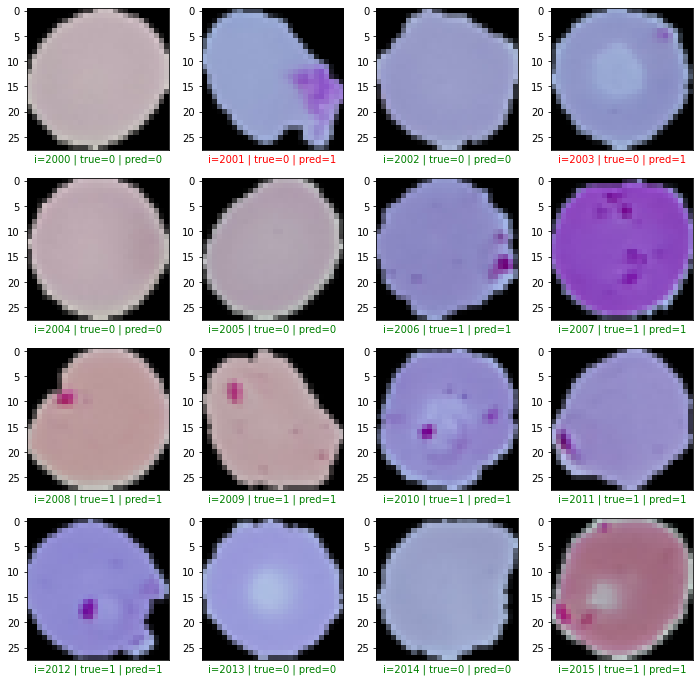

In [ ]:
#visualizing prediction vs ground truth of random image samples

plt.figure(figsize=(12,12))
start_index = 2000
for i in range(16):
  plt.subplot(4,4,i+1)
  plt.grid(False)
  plt.xticks([])
  plt.yticks=([])
  pred = np.argmax(preds[start_index+i])
  actual = y_test[start_index+i]
  col = 'g'
  if pred!=actual:
    col = 'r'
  plt.xlabel("i={} | true={} | pred={}".format(start_index+i,actual,pred),color = col)
  plt.imshow(x_test[start_index + i], cmap='binary')
plt.show()

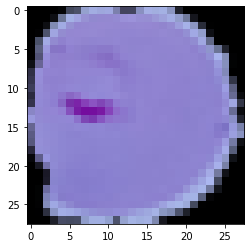

Image Sample = 1723 | Ground Truth = 1 | Prediction = 1 | Conclusion = INFECTED


In [ ]:
def conclusion(actual,pred):
  if actual == pred:
    if actual == 1:
      return "INFECTED"
    else:
      return "Uninfected"
  else:
    return "Inconclusive"

j = 1723
plt.imshow(x_test[i])
plt.show()
actual,pred = y_test[j],np.argmax(preds[j])
print("Image Sample = {} | Ground Truth = {} | Prediction = {} | Conclusion = {}".format(j,actual,pred,conclusion(actual,pred)))